### Score: 33

Q1.[11]

Q2.[11+11]

**Collaboration:**  

Collaboration on solving the assignment is allowed, after you have thought about the problem sets on your own. It is also OK to get clarification (but not solutions) from online resources, again after you have thought about the problem sets on your own. 

There are two requirements for collaboration: 

* Cite your collaborators **fully and completely** (*e.g.*, "XXX explained to me what is asked in problem set 3"). Or cite online resources (*e.g.*, "I got inspired by reading XXX") that helped you.

* Write your scripts and report **independently** - the scripts and report must come from you only.

# 1. Global Earthquakes

In this problem set, we will use this file from the USGS Earthquakes Database. The dataset is similar to the one you use in Assignment 02. Use the file provided (`usgs_earthquakes.csv`) to recreate the following map. Use the `mag` column for magnitude. **[10 points]**

C:\dev\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


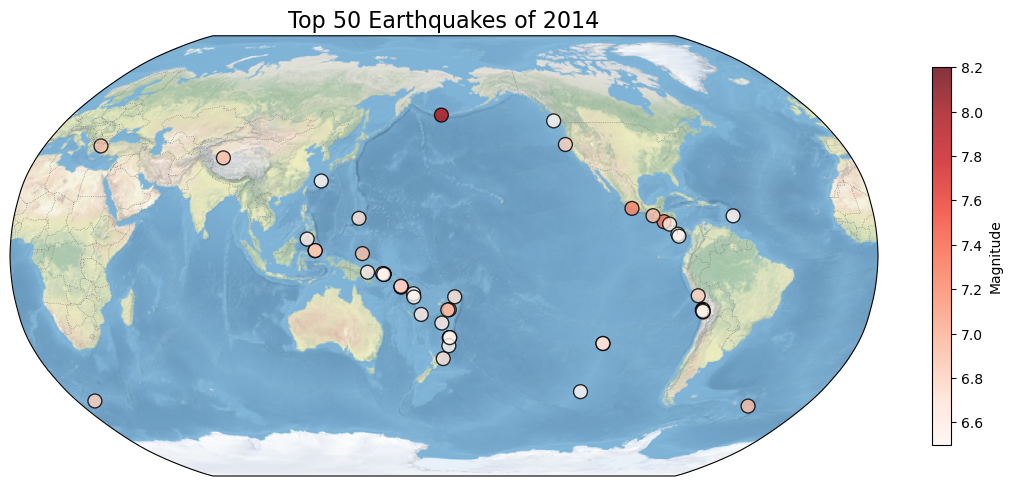

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 加载数据
usgs_eq = pd.read_csv(r'C:\Users\zjm\Desktop\ESE_5023\usgs_earthquakes.csv')

# 筛选震级前50的数据并清理
top_50 = usgs_eq.nlargest(50, 'mag')[['latitude', 'longitude', 'mag']].dropna()

# 设置绘图
plt.figure(figsize=(14, 7))
# 将投影中心调整为太平洋中央（180度）
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.set_global()

# 添加真实地形的特征
ax.stock_img()

# 添加海岸线和边界
# ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray', linewidth=0.5)

# 绘制地震点
scatter = plt.scatter(
    top_50['longitude'],
    top_50['latitude'],
    c=top_50['mag'],
    cmap='Reds',
    s=100,
    transform=ccrs.PlateCarree(),
    edgecolor='black',
    alpha=0.8
)

# 添加颜色条
cbar = plt.colorbar(scatter, orientation='vertical', shrink=0.7, pad=0.05)
cbar.set_label('Magnitude')

# 设置标题
plt.title('Top 50 Earthquakes of 2014', fontsize=16)

# 显示地图
plt.show()


# 2. Explore a `netCDF` dataset
Browse the NASA’s Goddard Earth Sciences Data and Information Services Center (GES DISC) website. Search and download a dataset you are interested in. You are also welcome to use data from your group in this problem set. But the dataset should be in `netCDF` format. For this problem set, you are welcome to use the same dataset you used in Assignment 03.

2.1 **[10 points]** Make a global map of a certain variable. Your figure should contain: a project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (**1 point each**).

数据链接：https://send.cra.moe/file/hk7xEtl3t8y6TfhZ/ShMTSrH2oKy6bFhk/oco2_GEOS_L3CO2_month_2015_2022.nc.nc

### 这里的投影是`Robinson()`

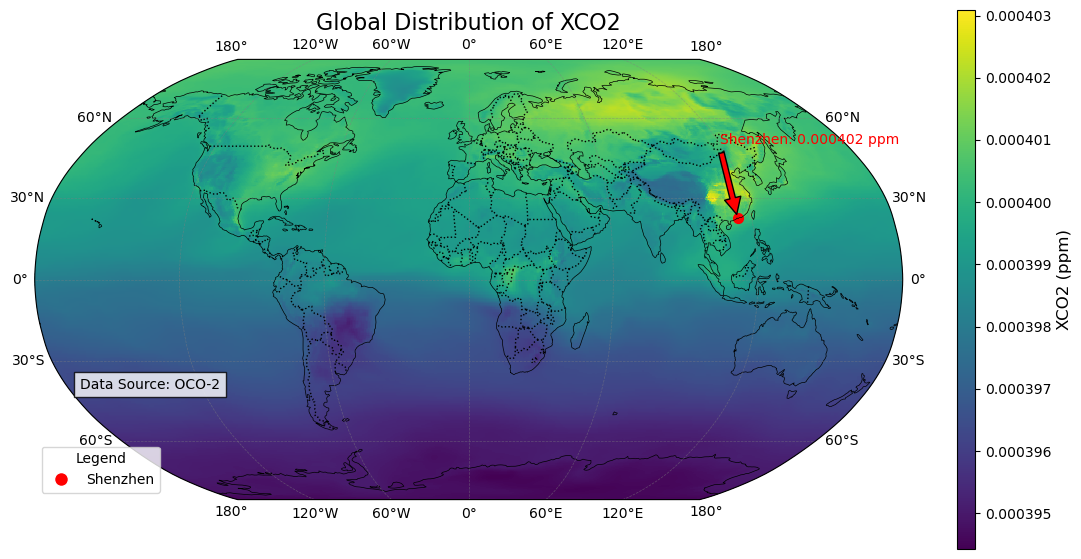

In [9]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.lines import Line2D

# 加载数据
data = xr.open_dataset('oco2_GEOS_L3CO2_month_2015_2022.nc')

# 提取变量和纬度/经度
xco2 = data['XCO2']  # 提取 XCO2 变量
latitude = data['lat']
longitude = data['lon']

# 获取深圳的 经纬度
target_lon = 114.05
target_lat = 22.54

# 使用最近邻查找目标点的 XCO2 值
target_xco2 = xco2[0, :, :].sel(lat=target_lat, lon=target_lon, method='nearest').item()

# 投影：Robinson()
# 设置绘图投影：Robinson()
plt.figure(figsize=(14, 7))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()

# mask & feature
# 添加地形特征
ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')
ax.add_feature(cfeature.OCEAN, facecolor='aqua')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')

# 绘制数据图层
mesh = plt.pcolormesh(
    longitude, latitude, xco2[0, :, :],  # 使用第一个时间步的数据
    transform=ccrs.PlateCarree(),
    cmap='viridis',
    shading='auto'
)

# 颜色条
# 添加颜色条
cbar = plt.colorbar(mesh, orientation='vertical', pad=0.05, aspect=30)
cbar.set_label('XCO2 (ppm)', fontsize=12)

# 添加红点标记深圳位置
plt.scatter(
    target_lon, target_lat, color='red', s=50, transform=ccrs.PlateCarree(), label='Shenzhen'
)

# 网格线
# 添加网格线
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

# 标题
# 添加标题
plt.title('Global Distribution of XCO2', fontsize=16)

# text
# 添加文本框，调整到左下角
plt.text(
    -175, -40,  # 地图左下角经纬度位置
    'Data Source: OCO-2',
    fontsize=10,
    bbox=dict(facecolor='white', alpha=0.8),
    transform=ccrs.PlateCarree()  # 使用 PlateCarree 确保与地图数据对齐
)

# 注释
# 添加注释，显示深圳的 XCO2 值
plt.annotate(
    f'Shenzhen: {target_xco2:.6f} ppm',
    xy=(target_lon, target_lat),  # 深圳经纬度
    xytext=(120, 50),  # 注释位置
    arrowprops=dict(facecolor='red', shrink=0.05),
    fontsize=10,
    color='red',
    transform=ccrs.PlateCarree()  # 确保注释位置与数据一致
)

# 图例
# 添加图例
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Shenzhen'),
]
plt.legend(
    handles=legend_elements,
    loc='lower left',
    fontsize=10,
    title='Legend',
    frameon=True
)

# x,y标签和label
# 设置坐标轴标签
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# 显示地图
plt.show()


2.2 **[10 points]** Make a regional map of the same variable. Your figure should contain: a different project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (**1 point each**).

#### 这里的投影是`PlateCarree()`

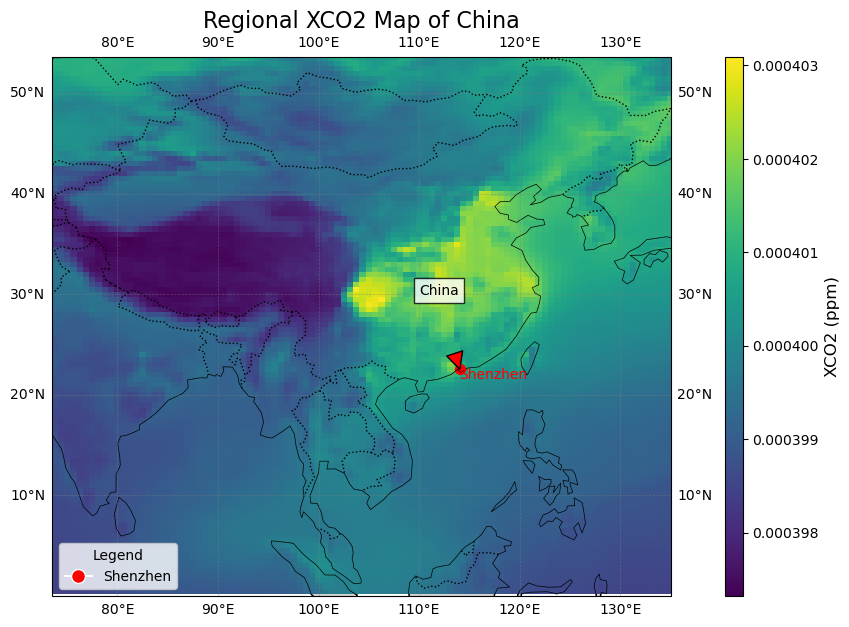

In [10]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.lines import Line2D

# 加载数据
data = xr.open_dataset('oco2_GEOS_L3CO2_month_2015_2022.nc')

# 提取变量和纬度/经度
xco2 = data['XCO2']  # 提取 XCO2 变量
latitude = data['lat']
longitude = data['lon']

# 定义中国区域的经纬度范围
region_lon_min, region_lon_max = 73.5, 135.0
region_lat_min, region_lat_max = 0, 53.6

# 筛选中国区域的数据
regional_xco2 = xco2.sel(lat=slice(region_lat_min, region_lat_max),
                         lon=slice(region_lon_min, region_lon_max))

# 深圳的经纬度
target_lon = 114.05
target_lat = 22.54

# 投影：PlateCarree()
# 设置绘图
plt.figure(figsize=(14, 7))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([region_lon_min, region_lon_max, region_lat_min, region_lat_max], crs=ccrs.PlateCarree())

# mask & feature
# 添加地形特征
ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')

# 绘制数据图层
mesh = plt.pcolormesh(
    regional_xco2['lon'], regional_xco2['lat'], regional_xco2[0, :, :],  # 使用第一个时间步的数据
    transform=ccrs.PlateCarree(),
    cmap='viridis',
    shading='auto'
)

# 颜色条
# 添加颜色条
cbar = plt.colorbar(mesh, orientation='vertical', pad=0.05, aspect=30)
cbar.set_label('XCO2 (ppm)', fontsize=12)

# 添加红点标记深圳位置
plt.scatter(
    target_lon, target_lat, color='red', s=50, transform=ccrs.PlateCarree(), label='Shenzhen'
)

# 网格线
# 添加网格线
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

# 标题
# 添加标题
plt.title('Regional XCO2 Map of China', fontsize=16)

# text box
# 添加文本框
plt.text(110, 30, 'China', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# 注释
# 添加注释
plt.annotate(
    f'Shenzhen',
    xy=(target_lon, target_lat),  
    xytext=(114, 21.6),  # 注释位置
    arrowprops=dict(facecolor='red', shrink=0.05),
    fontsize=10,
    color='red',
    transform=ccrs.PlateCarree()  # 确保注释位置与数据一致
)

# 图例
# 添加图例
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Shenzhen'),
]
plt.legend(
    handles=legend_elements,
    loc='lower left',
    fontsize=10,
    title='Legend',
    frameon=True
)

# xlabel & ylabel
# 设置坐标轴标签
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# 显示地图
plt.show()
